# Standard error and confidence intervals

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats

In [2]:
age = pd.read_csv("../data/external/age.csv")
age = age[["C_AGE_NAME", "OBS_VALUE"]]
age.C_AGE_NAME = age.C_AGE_NAME.str.replace("Age under 1", "0")
age.C_AGE_NAME = age.C_AGE_NAME.str.replace(" and over", "")
age.C_AGE_NAME = age.C_AGE_NAME.str.replace("Age ", "")
age.C_AGE_NAME = pd.to_numeric(age.C_AGE_NAME)
sum_obsvalue = age.OBS_VALUE.sum()  # for checks

age = age.loc[age.index.repeat(age["OBS_VALUE"])]

if len(age.index) != sum_obsvalue:
    raise Exception("age data frame not spread correctly")

age = age.drop("OBS_VALUE", axis = 1)  # default 'axis' is 'index'
    
age.describe()

,C_AGE_NAME
count,552698.000000
mean,37.872098
std,23.053824
min,0.000000
25%,20.000000
50%,36.000000
75%,55.000000
max,100.000000


In [3]:
age_ebn = pd.read_csv("../data/external/age_ebn.csv")
age_ebn = age_ebn[["C_AGE_NAME", "OBS_VALUE"]]
age_ebn.C_AGE_NAME = age_ebn.C_AGE_NAME.str.replace("Age under 1", "0")
age_ebn.C_AGE_NAME = age_ebn.C_AGE_NAME.str.replace(" and over", "")
age_ebn.C_AGE_NAME = age_ebn.C_AGE_NAME.str.replace("Age ", "")
age_ebn.C_AGE_NAME = pd.to_numeric(age_ebn.C_AGE_NAME)
sum_obsvalue = age_ebn.OBS_VALUE.sum()  # for checks

age_ebn = age_ebn.loc[age_ebn.index.repeat(age_ebn["OBS_VALUE"])]

if len(age_ebn.index) != sum_obsvalue:
    raise Exception("age_ebn data frame not spread correctly")

age_ebn = age_ebn.drop("OBS_VALUE", axis = 1)

age_ebn.describe()

,C_AGE_NAME
count,99412.000000
mean,42.833169
std,24.719087
min,0.000000
25%,22.000000
50%,43.000000
75%,63.000000
max,100.000000


You can calculate a standard error of many parameters, but typically it refers to the standard error of the mean ($SE_{\bar{x}}$).
The standard error of the mean differs from the standard deviation: the standard deviation quantifies how well the sample mean fits the observed (i.e. sample) data, and the standard error of the mean quantifies how well the sample mean matches the population mean.

Because any sample we take from the population is going to be slightly different from all other samples (because everything varies) each sample mean is going to be slightly different from every other.
The standard error of the mean is a measure of how confident our sample mean matches the population mean.

One approach to calculate the standard error of the mean would be to take multiple samples.
The mean of each of these samples would form a sampling distribution due to variation: some sample means would be lower than the population mean; some sample means would be higher than the population mean; and many would be the same.
These sample mean values would form a normal distribution around the population mean.
The standard deviation of these sample means would tell us how well our sample means fit the population mean.

In practice we can usually only take one sample so we can estimate it with:

$$
\sigma_{\bar{x}} \approx \frac{s}{\sqrt{n}}
$$

where $\sigma_{\bar{x}}$ is the standard error of the population mean (the parameter we're trying to estimate), $s$ is the sample standard deviation, and $n$ is the number of observations in the sample ($\approx$ just means 'approximately equal to').

We can demonstrate this with the census (in fact, we could demonstrate this with any data set and pretend it's the population and take multiple samples from it, but why not just use an actual population?).
I'm using ages of all people in Sheffield in 2011 to illustrate this, which I download from Nomisweb:

The following is a histogram of ages of people living in Sheffield from the 2011 Census.

Text(0, 0.5, 'Frequency')

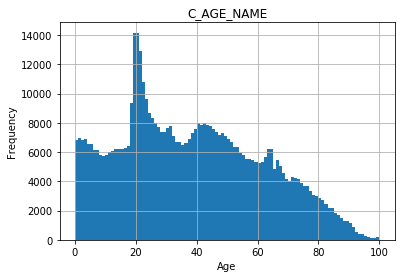

In [4]:
age.hist("C_AGE_NAME", bins = 100)
plt.xlabel("Age")
plt.ylabel("Frequency")

The median age is:

In [5]:
age.C_AGE_NAME.median()

36.0

The mean age is (remember this is the mean of the population, which we wouldn't normally know):

In [6]:
age.C_AGE_NAME.mean()

37.87209832494418

Let's take 1000 samples of 100 people from the population, and make a sampling distribution of these means:

In [7]:
samples = []

for i in range(1000):
    sample = age.sample(n = 100, replace = True, random_state = i)
    sample = sample.C_AGE_NAME.mean()
    samples.append(sample)

samples = pd.Series(samples)

The following is a distribution of the sample means (a sampling distribution):

Text(0, 0.5, 'Frequency')

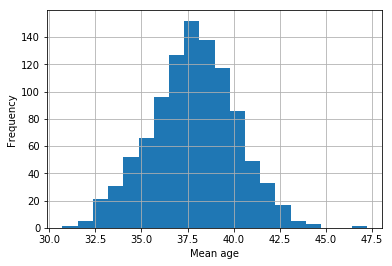

In [8]:
samples.hist(bins = 20)
plt.xlabel("Mean age")
plt.ylabel("Frequency")

Most sample means are around 38, although a few are lower than 32 and higher than 45. Remember  in this case we know the population mean, but we wouldn't normally know this.
If we just had access to one sample, how would we know if the resultant sample mean was close to the population mean?

From the histogram of sample means we can see that it's more likely to end up with a sample mean that's close to the population mean than one that's further away, and we can quantify this with a confidence interval.

Let's take one sample of 1000 random cases from the original data set and pretend it's all we have access to:

In [9]:
sample = age.sample(n = 1000, replace = True, random_state = 42)

The mean of this sample is:

In [10]:
sample.C_AGE_NAME.mean()

37.037

This is very close to the population mean but not quite the same.
The standard error of this sample mean is:

In [11]:
sample.C_AGE_NAME.sem()

0.73612329708311

We know that an ideal normal distribution will have [95\% of cases within 1.96 standard deviations of the mean](https://en.wikipedia.org/wiki/Normal_distribution#Standard_deviation_and_coverage).
If we multiply our standard error by $\pm$ 1.96 that therefore defines a 95% confidence interval.
In this case we would have an interval of:

In [12]:
sample.C_AGE_NAME.mean() - 1.96 * sample.C_AGE_NAME.sem()

35.5941983377171

to:

In [13]:
sample.C_AGE_NAME.mean() + 1.96 * sample.C_AGE_NAME.sem()

38.479801662282895

This effectively estimates that if we were to take 100 samples the population mean would fall within these bounds 95 times.
In our example the population mean is indeed within the 95% confidence interval of the sample mean (remember the population mean was:)

In [14]:
age.C_AGE_NAME.mean()

37.87209832494418

To calculate 99% confidence intervals use 2.58 standard deviations rather than 1.96, in this example resulting in a confidence interval between:

In [15]:
sample.C_AGE_NAME.mean() - 2.58 * sample.C_AGE_NAME.sem()

35.13780189352558

and:

In [16]:
sample.C_AGE_NAME.mean() + 2.58 * sample.C_AGE_NAME.sem()

38.93619810647442

Perhaps counterintuitively this results in a wider interval (because the interval ensures the population mean falls within these bounds 99 times instead of 95); it is not 'more precise'.

From the standard error of the mean and confidence interval we can therefore quantify how confident we are that the sample mean is close to the true population mean.

## Comparing means and confidence intervals

A useful property of confidence intervals is that they can be used to compare two or more means to see if they are statistically significantly different.
For example, we have a sample of the ages of people in Sheffield and we could create a similar sample of the ages of people in Eastbourne, calculate the confidence intervals, and compare them to see if they differ (i.e. if, on average, people are older in Eastbourne).

From the table above we can see that the mean *is* higher than the mean for Sheffield, but remember we are comparing populations and we would not typically have access to this information.
Let's take a sample of 1,000 individuals and calculate the mean and standard error of the mean:

In [17]:
sample_eb = age_ebn.sample(n = 1000, replace = True, random_state = 42)
sample_eb.C_AGE_NAME.mean()

42.294

So our sample mean is also different, but can we be sure it's different and not just the result of our sampling?'. Using the standard error of the mean our confidence interval is:

In [18]:
sample_eb.C_AGE_NAME.mean() - 1.96 * sample_eb.C_AGE_NAME.sem()

40.757572452123995

and

In [19]:
sample_eb.C_AGE_NAME.mean() + 1.96 * sample_eb.C_AGE_NAME.sem()

43.830427547876

Note that, reassuringly, this interval contains our population mean. Note also that the full interval is higher than the Sheffield interval (i.e. the top of the Sheffield interval is below the bottom of the Eastbourne interval). This means that the mean age of Sheffield and Eastbourne are statistically significantly different at the 95% confidence level.

We can visualise the confidence intervals as:

In [20]:
age_cis = {"town": ["Sheffield", "Eastbourne"],
           "mean": [sample.C_AGE_NAME.mean(), sample_eb.C_AGE_NAME.mean()],
           "sem":  [sample.C_AGE_NAME.sem(), sample_eb.C_AGE_NAME.sem()]}

age_cis = pd.DataFrame.from_dict(age_cis)
age_cis

,town,mean,sem
0,Sheffield,37.037,0.736123
1,Eastbourne,42.294,0.783892


Text(0.5, 0, 'Town')

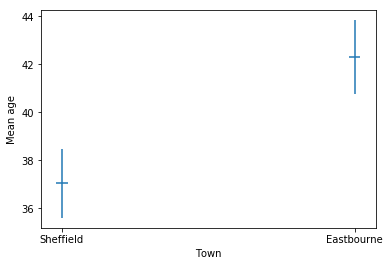

In [21]:
plt.errorbar(
    x = [1, 2], y = age_cis["mean"],
    xerr = 0.02, yerr = 1.96 * age_cis["sem"],
    linestyle = ""
)
plt.xticks([1, 2], age_cis["town"])
plt.ylabel("Mean age")
plt.xlabel("Town")

As you can see in this example the correlation statistic is very similar and the $p$ value is still significant ($<< 0.01$).